<H2>PROJECT: HEART DISEASE PREDICTION</H2>

<OL>
  <LI><H2>Problem Definition</H2></LI>
  <P>Heart diseases are among the leading causes of death worldwide. With numerous heart-related conditions, early prediction can play a crucial role in treatment and improving patient outcomes. By identifying potential risks early, individuals can adopt necessary lifestyle changes and receive timely medical intervention.</P>

  <LI><H2>Why This Problem?</H2></LI>
  <P>Early detection of heart diseases can prevent severe complications and potentially save lives. Traditional diagnostic methods often involve extensive medical evaluations, which can be time-consuming and expensive. A machine learning-based approach provides an automated, cost-effective solution by identifying high-risk individuals, enabling healthcare providers to prioritize those who require immediate attention.</P>

  <LI><H2>Approach</H2></LI>
  <P>This project utilizes both the K-Nearest Neighbors (KNN) algorithm and the Decision Tree algorithm for predicting heart diseases.</P>
  <P>
    - <B>KNN:</B> Chosen for its simplicity and effectiveness, KNN works well with data that may not follow linear separability, capturing complex patterns with moderate tuning.
  </P>
  <P>
    - <B>Decision Trees:</B> These are intuitive and capable of handling both numerical and categorical data, making them ideal for capturing non-linear relationships in the dataset.
  </P>
  <P>The dataset for this project, the Heart Disease UCI dataset, was sourced from Kaggle. Machine learning techniques were applied to analyze the data and predict the likelihood of an individual developing heart disease.</P>
</OL>


<H1>CODE :</H1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score

<ol>

<li>seaborn is used for high-level interface for drawing attractive and informative statistical graphics.</li>
<li>train_test_split used to for spliting data for traing</li>
<li>cross_val_score for cross-validation </li>
</ol>

In [ ]:
df = pd.read_csv('HeartDisease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


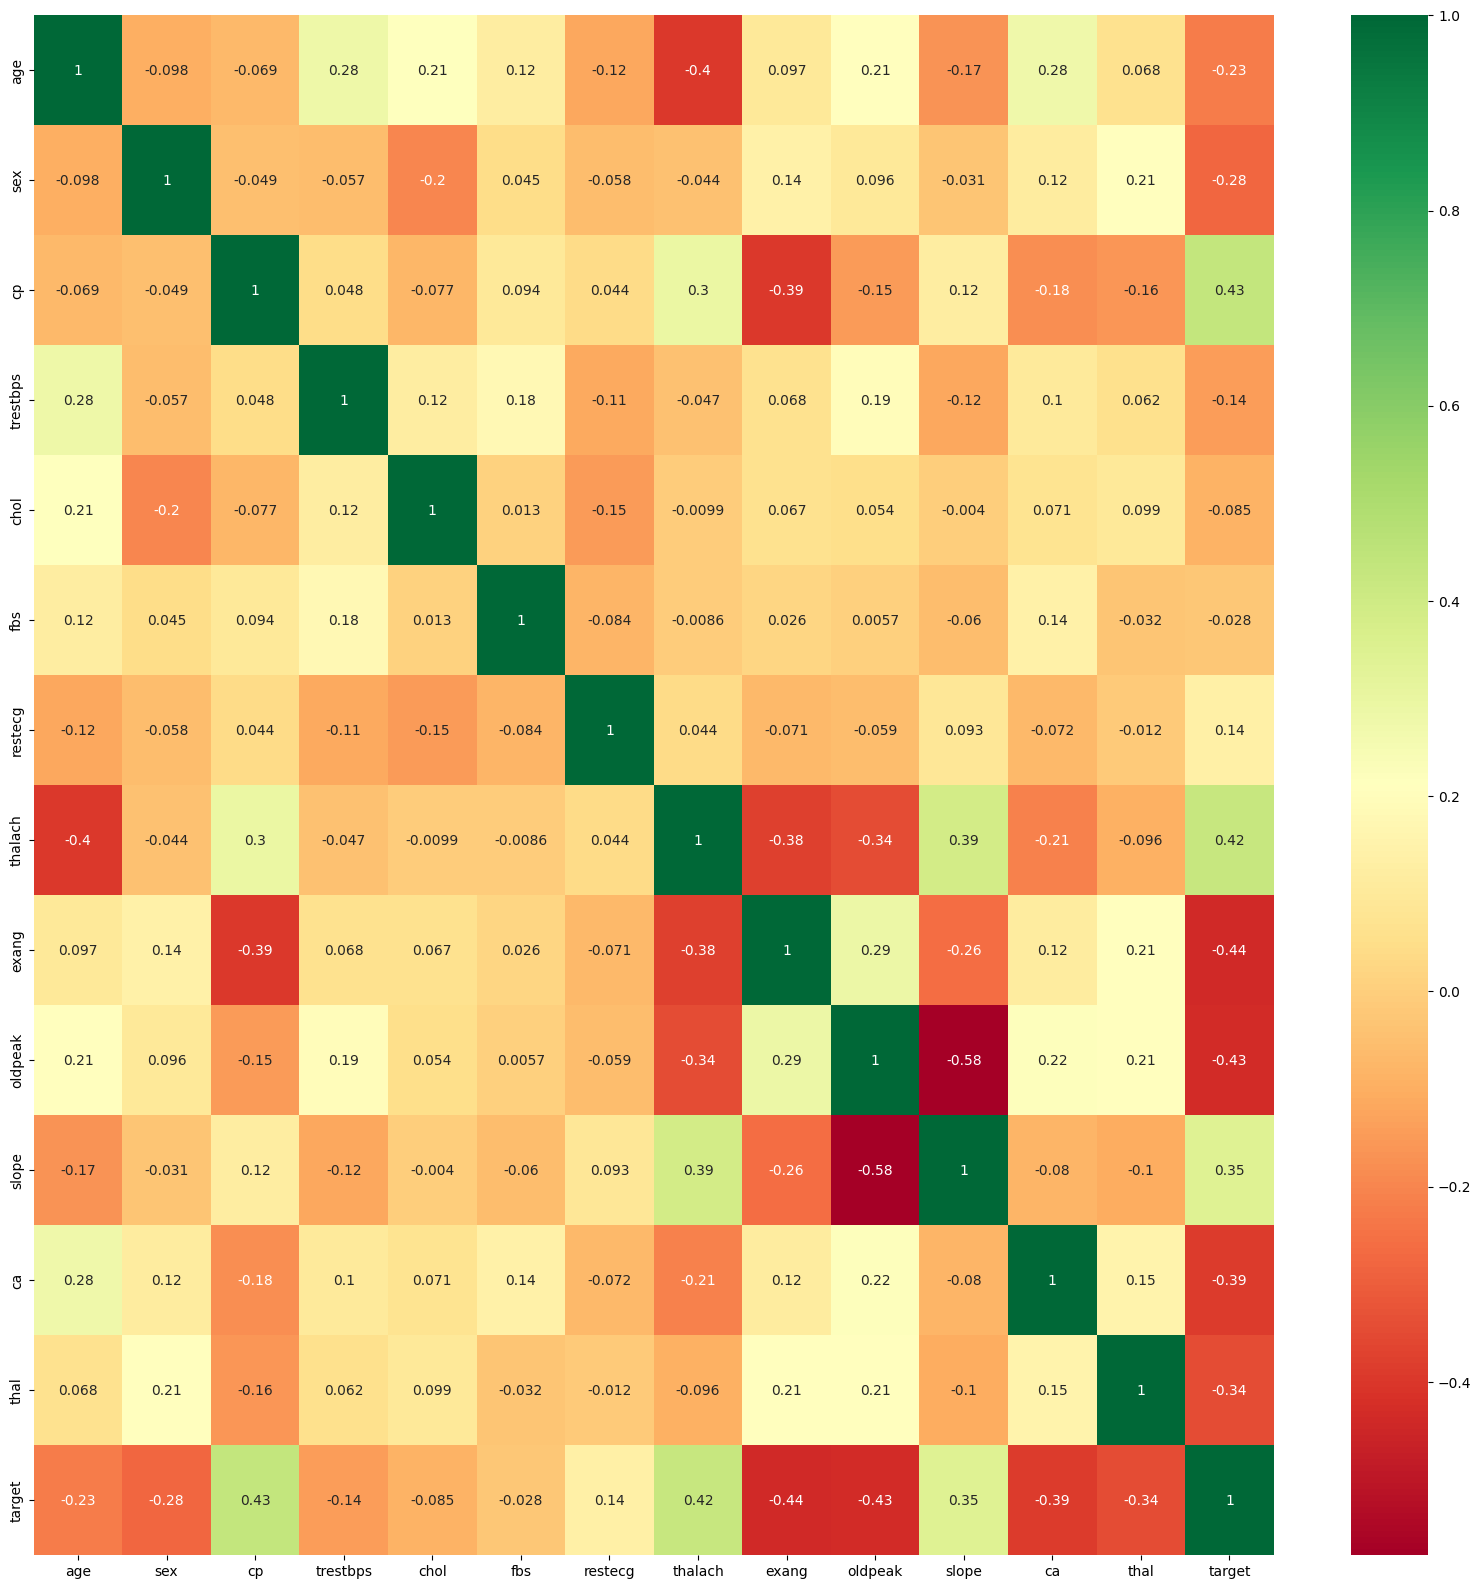

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<H2>Code Explanation</H2>

<OL>
  <LI><H2>Correlation Matrix Creation</H2></LI>
  <P><CODE>corrmat = df.corr()</CODE></P>
  <P>This line calculates the correlation values between all features in the dataset and creates a correlation matrix. A correlation matrix shows the pairwise correlation coefficients between numeric columns, which helps identify the relationships between features. The values range from:
    <UL>
      <LI>-1: Perfect negative correlation.</LI>
      <LI>0: No correlation.</LI>
      <LI>1: Perfect positive correlation.</LI>
    </UL>
  </P>

  <LI><H2>Extracting Feature Names</H2></LI>
  <P><CODE>corrmat.index</CODE>: Retrieves the index of the correlation matrix, containing the names of the features (columns) in the dataset. This is stored in <CODE>top_corr_features</CODE> for use in the heatmap generation.</P>

  <LI><H2>Setting Plot Dimensions</H2></LI>
  <P><CODE>plt.figure(figsize=(20,20))</CODE>: Specifies the size of the figure to be 20 inches wide and 20 inches high, ensuring adequate space for a clear and readable heatmap, especially when working with many features.</P>

  <LI><H2>Creating the Heatmap</H2></LI>
  <P><CODE>g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")</CODE>: This line uses Seaborn to create a heatmap that visualizes the correlations between features.</P>
  <P>
    <UL>
      <LI><CODE>sns.heatmap()</CODE>: A Seaborn function used to create visually appealing and detailed heatmaps.</LI>
      <LI><CODE>df[top_corr_features].corr()</CODE>: Generates the correlation matrix for the selected features.</LI>
      <LI><CODE>annot=True</CODE>: Displays the correlation coefficient values directly within the heatmap cells, aiding interpretation.</LI>
      <LI><CODE>cmap="RdYlGn"</CODE>: Specifies the "Red-Yellow-Green" colormap:
        <UL>
          <LI>Red represents strong negative correlations.</LI>
          <LI>Yellow indicates no correlation.</LI>
          <LI>Green shows strong positive correlations.</LI>
        </UL>
      </LI>
    </UL>
  </P>
  <P>The heatmap provides an intuitive and comprehensive visualization of the relationships between features in the dataset.</P>
</OL>


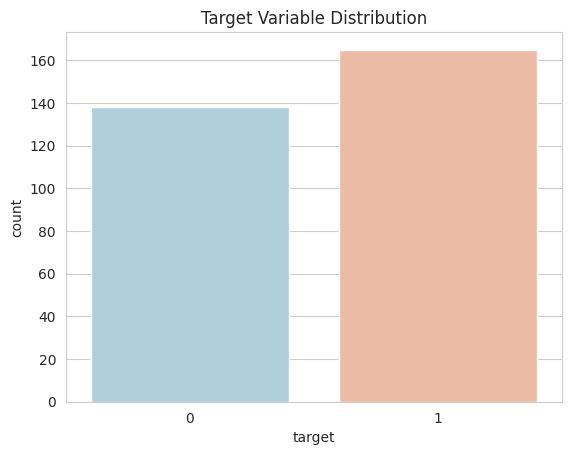

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, hue='target', palette='RdBu_r', legend=False)
plt.title("Target Variable Distribution")
plt.show()

<H2>Code Explanation</H2>

<OL>
  <LI><H2>Setting the Style</H2></LI>
  <P><CODE>sns.set_style('whitegrid')</CODE>: This function is used to set the overall style of the graph. The "whitegrid" style adds a light grid background to make the plot visually appealing and easy to interpret.</P>

  <LI><H2>Creating a Count Plot</H2></LI>
  <P><CODE>sns.countplot(x='target', data=df, hue='target', palette='RdBu_r', legend=False)</CODE>: This function generates a count plot that displays the frequency of each unique value in the target variable.</P>
  <P>
    <UL>
      <LI><CODE>sns.countplot()</CODE>: Used to create a count plot, which shows the count of observations for categorical data.</LI>
      <LI><CODE>x='target'</CODE>: Specifies the target variable to be plotted on the x-axis.</LI>
      <LI><CODE>data=df</CODE>: Sets the DataFrame `df` as the source of the data.</LI>
      <LI><CODE>hue='target'</CODE>: Differentiates the categories within the target variable using color.</LI>
      <LI><CODE>palette='RdBu_r'</CODE>: Applies a red-to-blue reversed colormap to the plot.</LI>
      <LI><CODE>legend=False</CODE>: Disables the display of a legend on the plot.</LI>
    </UL>
  </P>

  <LI><H2>Adding a Title</H2></LI>
  <P><CODE>plt.title("Target Variable Distribution")</CODE>: Sets the title of the plot to "Target Variable Distribution". This provides context to the visualization.</P>

  <LI><H2>Displaying the Plot</H2></LI>
  <P><CODE>plt.show()</CODE>: Renders the plot for viewing.</P>
</OL>


<H3>Data Processing</H3>
<P>During dataset exploration, I identified the need to preprocess the data by converting categorical variables into dummy variables and scaling all numerical values. This step ensures the dataset is suitable for training Machine Learning models. Below are the steps:</P>
<OL>
  <LI><H3>Converting Categorical Variables</H3></LI>
  <P><CODE>get_dummies</CODE>: This method is used to create dummy columns for categorical variables, converting them into a numerical format suitable for Machine Learning algorithms. Each unique category is represented as a separate column with binary values (0 or 1).</P>
  <LI><H3>Scaling the Data</H3></LI>
  <P>Before training the models, all features are scaled to ensure they have comparable ranges. This step is crucial for models that rely on distance-based calculations, like KNN, or models sensitive to feature magnitudes.</P>
</OL>


In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

<H3>Scaling Data with StandardScaler</H3>

<OL>
  <LI><H3>Initializing the Scaler</H3></LI>
  <P><CODE>standardScaler = StandardScaler()</CODE>: Creates an instance of the `StandardScaler` class from the `sklearn` library. This scaler standardizes features by removing the mean and scaling them to unit variance, ensuring all features have comparable magnitudes.</P>

  <LI><H3>Selecting Columns to Scale</H3></LI>
  <P><CODE>columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']</CODE>: Specifies the list of columns in the dataset that need to be scaled. These columns are numerical and have varying ranges, which can affect the performance of certain Machine Learning algorithms.</P>

  <LI><H3>Applying the Scaler</H3></LI>
  <P><CODE>dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])</CODE>: This line performs the following:
    <UL>
      <LI><CODE>fit_transform()</CODE>: Computes the mean and standard deviation for the specified columns and scales the data accordingly.</LI>
      <LI>Reassigns the scaled values back to the original dataset columns, replacing the unscaled data.</LI>
    </UL>
  </P>
  <P>As a result, the selected columns are standardized to have a mean of 0 and a standard deviation of 1, making the data ready for Machine Learning models.</P>
</OL>


In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


<H1>KNN CLASSIFICATION</H1>

In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

<H3>Splitting Features and Target Variable</H3>

<OL>
  <LI><H3>Assigning the Target Variable</H3></LI>
  <P><CODE>y = dataset['target']</CODE>: Here, we assign the `target` column to <CODE>y</CODE>, which represents the dependent variable (the outcome we want to predict, such as the presence or absence of heart disease).</P>

  <LI><H3>Assigning the Features</H3></LI>
  <P><CODE>X = dataset.drop(['target'], axis=1)</CODE>: This line drops the `target` column from the dataset, leaving all other columns as input features. These are the independent variables (the inputs) used to make predictions.</P>
</OL>


In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10,scoring='precision')
    knn_scores.append(score.mean())

<H3>K-Nearest Neighbors (KNN) Cross-Validation</H3>

<OL>
  <LI><H3>Importing cross_val_score</H3></LI>
  <P><CODE>from sklearn.model_selection import cross_val_score</CODE>: This imports the <CODE>cross_val_score</CODE> function from `sklearn.model_selection`, which allows us to perform cross-validation to evaluate the performance of machine learning models.</P>

  <LI><H3>Evaluating KNN for Different k Values</H3></LI>
  <P><CODE>knn_scores = []</CODE>: Initializes an empty list <CODE>knn_scores</CODE> to store the mean accuracy scores for each value of k.</P>
  <P><CODE>for k in range(1, 21):</CODE>: Iterates over values of k from 1 to 20. Each value of k represents a different number of neighbors used by the KNN classifier.</P>

  <LI><H3>Creating the KNN Classifier</H3></LI>
  <P><CODE>knn_classifier = KNeighborsClassifier(n_neighbors = k)</CODE>: Creates a new instance of the KNN classifier with the current value of k (number of neighbors).</P>

  <LI><H3>Performing Cross-Validation</H3></LI>
  <P><CODE>score = cross_val_score(knn_classifier, X, y, cv=10, scoring='precision')</CODE>: This performs 10-fold cross-validation on the KNN classifier, where:
    <UL>
      <LI><CODE>cv=10</CODE>: Specifies 10-fold cross-validation, meaning the data is split into 10 subsets, and the model is trained and evaluated 10 times, each time using a different subset as the validation set.</LI>
      <LI><CODE>scoring='precision'</CODE>: The scoring metric used for evaluation is precision, which measures the proportion of true positive predictions among all positive predictions.</LI>
    </UL>
  </P>

  <LI><H3>Storing the Mean Score</H3></LI>
  <P><CODE>knn_scores.append(score.mean())</CODE>: Appends the mean precision score for the current value of k to the <CODE>knn_scores</CODE> list. The mean score is calculated by averaging the precision scores obtained during the cross-validation process.</P>
</OL>


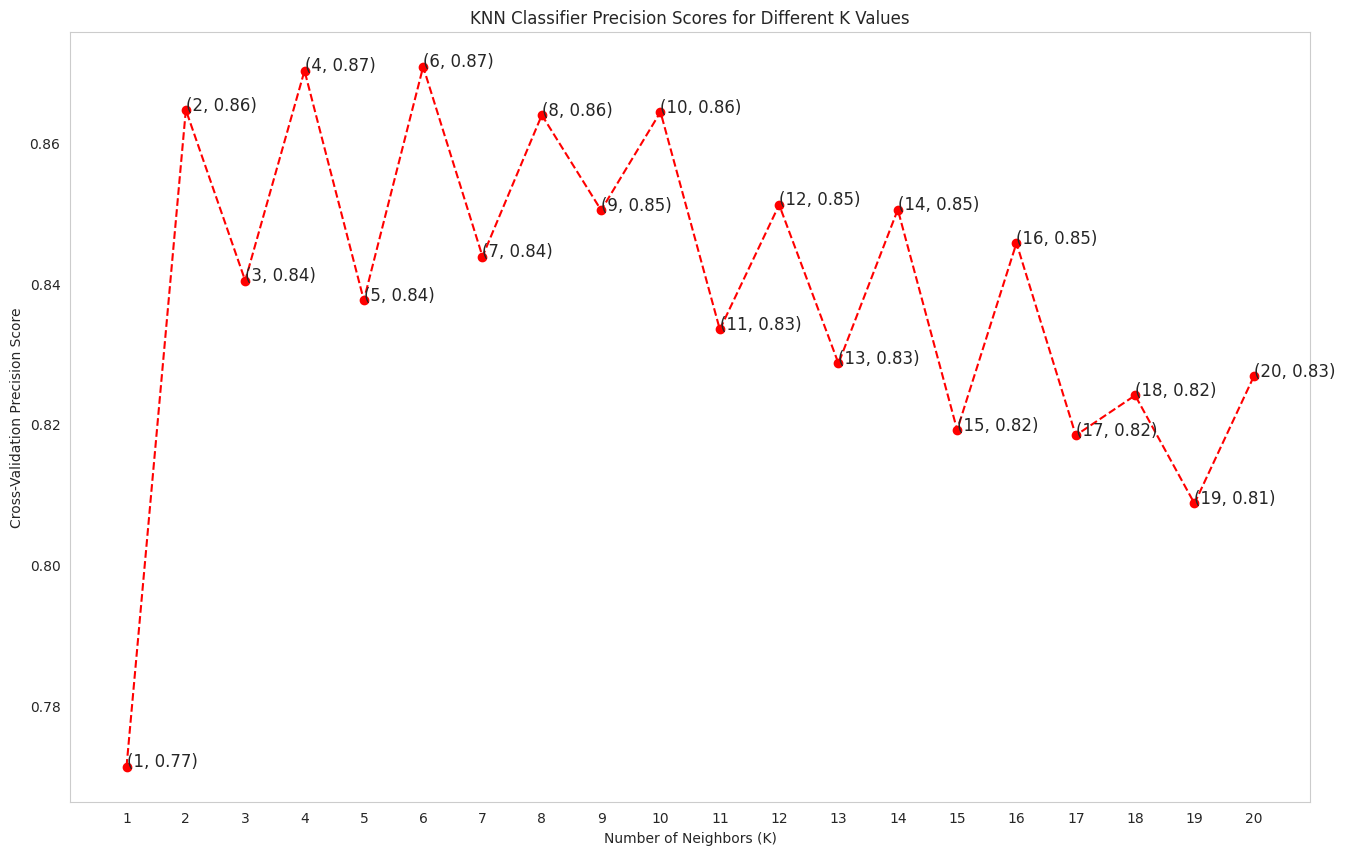

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(range(1, 21), knn_scores, color='red', marker='o', linestyle='dashed')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 2)), fontsize=12)

plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Precision Score')
plt.title('KNN Classifier Precision Scores for Different K Values')
plt.grid()
plt.show()

In [ ]:
cv_scores = knn_scores
k_values = list(range(1, 21))
best_k = k_values[np.argmax(cv_scores)]

print(f"The optimal k value is {best_k} with Precision score {max(cv_scores):.2f}")

The optimal k value is 6 with Precision score 0.87


In [ ]:
optimal_k = 6
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)

Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Train the model

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Predict on the test set

In [ ]:
y_pred = knn_classifier.predict(X_test)

Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
print(f"Model Precision on Test Set: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}")

Model Accuracy on Test Set: 85.25%
Model Precision on Test Set: 87.50%
Recall: 84.85
F1 Score: 86.15


 Plot predictions vs. actual values

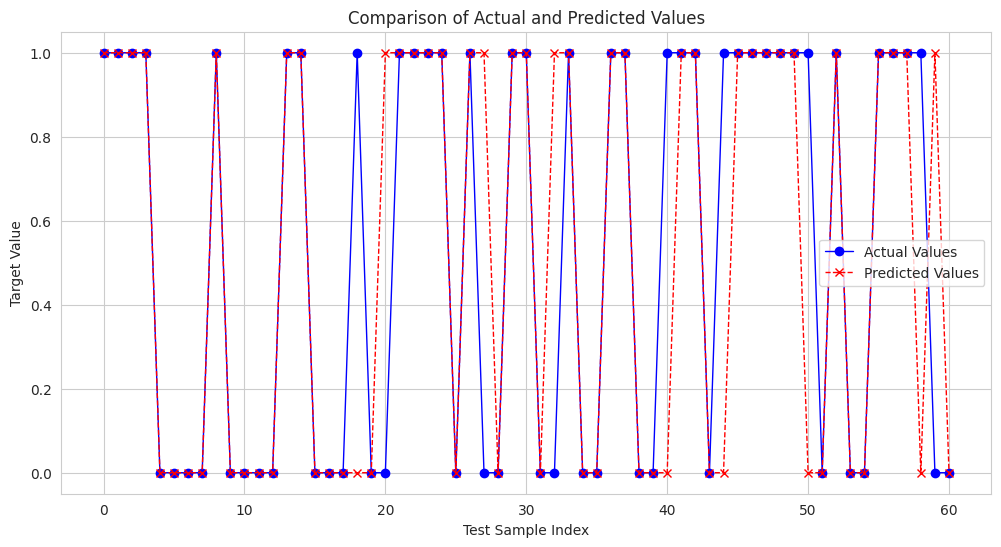

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(y_pred, label='Predicted Values', color='red', marker='x', linestyle='--', linewidth=1)
plt.xlabel('Test Sample Index')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
score.mean()

0.8267905056759546

<h1>DECISION TREE CLASSIFICATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Initialize the Decision Tree classifier

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()decision_tree_classifier = DecisionTreeClassifier()

Train the model

In [ ]:
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Predict on the test set

In [ ]:
y_pred = decision_tree_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")
print(f"Model Precision on Test Set: {precision * 100:.2f}%")
print(f"Recall: {recall*100:.2f}")
print(f"F1 Score: {f1*100:.2f}")

Model Accuracy on Test Set: 77.05%
Model Precision on Test Set: 77.14%
Recall: 81.82
F1 Score: 79.41


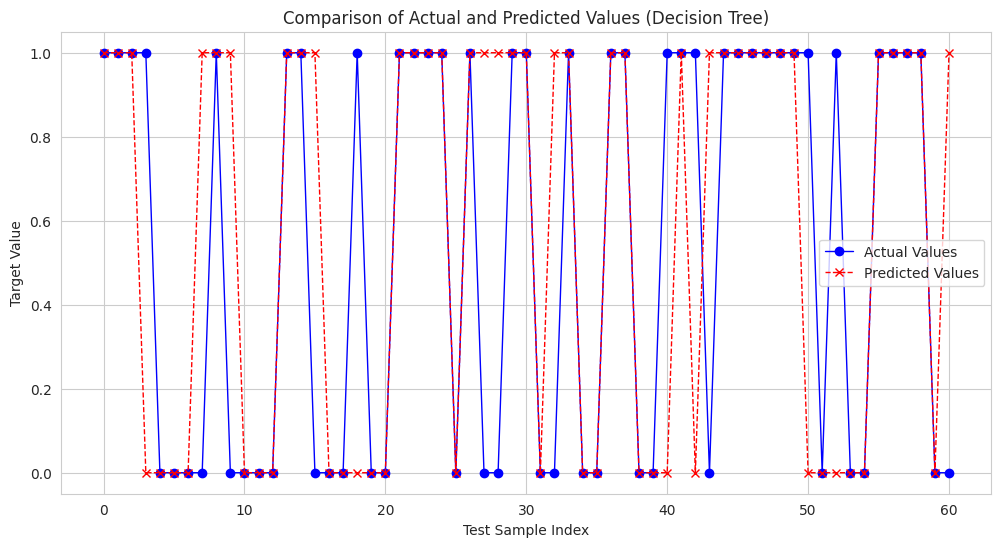

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(y_pred, label='Predicted Values', color='red', marker='x', linestyle='--', linewidth=1)
plt.xlabel('Test Sample Index')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values (Decision Tree)')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Example data (replace with your actual dataset)
X_train = np.random.rand(100, 13)  # 100 samples, 13 features
y_train = np.random.randint(0, 2, 100)  # Binary target

# Train the scaler and classifier
standardScaler = StandardScaler().fit(X_train)
X_train_scaled = standardScaler.transform(X_train)
knn_classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)

# Predict function
def predict_heart_disease(user_input):
    # Ensure user_input has exactly 13 features
    if len(user_input) != 13:
        raise ValueError(f"User input must have exactly 13 features. Got {len(user_input)} features.")

    # Debug: Print user input
    print("User input:", user_input)

    # Scale the input using the previously fitted StandardScaler
    try:
        user_input_scaled = standardScaler.transform([user_input])  # Use the pre-trained scaler
    except ValueError as e:
        raise ValueError(f"Error scaling input: {e}")

    # Debug: Print scaled input
    print("Scaled input:", user_input_scaled)

    # Make the prediction using the trained KNN classifier
    try:
        prediction = knn_classifier.predict(user_input_scaled)
    except ValueError as e:
        raise ValueError(f"Error predicting input: {e}")

    # Output the prediction
    if prediction[0] == 1:
        print("The person is likely to have heart disease.")
    else:
        print("The person is not likely to have heart disease.")

# Example user input with 13 features
user_input = [50, 1, 2, 130, 250, 1, 1, 150, 0, 1.5, 1, 1, 2]  # Replace with actual input

try:
    predict_heart_disease(user_input)
except Exception as e:
    print("Error:", e)


User input: [50, 1, 2, 130, 250, 1, 1, 150, 0, 1.5, 1, 1, 2]
Scaled input: [[160.32339618   1.76844431   5.58601893 458.22341208 846.55568323
    1.55366658   1.90464199 461.76638633  -1.77628505   3.33080109
    1.80738517   1.81836579   5.3080119 ]]
The person is not likely to have heart disease.
